In [0]:
# Anirban Bairagi
# 17PH20005
# Train LeNet5 on MNIST with Adam

%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.optim as optim

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [4]:
use_gpu = torch.cuda.is_available()
model = LeNet()
print(model)
if use_gpu:
    print('GPU is available!')
    model = model.cuda()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
X= np.arange(7,13)
Batch = [2**i for i in X] # change according to system specs
train_loss = []
for i in X:
  BatchSize=int(2**i)
  trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
  trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

  # Validation set with random rotations in the range [-90,90]
  testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
  testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader
  

  learning_rate = 0.1
  num_epochs = 5
  criterion = nn.CrossEntropyLoss() 
  params = model.parameters()
  optimizer = optim.Adam(params=params,lr=learning_rate)


  
  
  for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer.zero_grad() 
        # Data feed-forward through the network
        outputs = model(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        #loss=F.nll_loss(outputs,labels)
        loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
        loss.backward()
        optimizer.step()
        

    
  epoch_loss = running_loss.item()/(i+1)
  train_loss.append(epoch_loss) #train_loss after num_epochs
  print('BatchSize {:} | Training loss: {:.4f}'.format(BatchSize,epoch_loss))


Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!
BatchSize 128 | Training loss: 2.3076
BatchSize 256 | Training loss: 2.3056
BatchSize 512 | Training loss: 2.3043
BatchSize 1024 | Training loss: 2.3036
BatchSize 2048 | Training loss: 2.3024
BatchSize 4096 | Training loss: 2.3025


In [6]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])

BatchSize=256 # change according to system specs

  
trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader                        



Y= np.arange(1,10)/10
train_loss1 = []

for i in Y:
  num_epochs = 5
  criterion = nn.CrossEntropyLoss() 
  params = model.parameters()
  learning_rate= float(i)
  optimizer = optim.Adam(params=params,lr=learning_rate)


  for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer.zero_grad() 
        # Data feed-forward through the network
        outputs = model(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        #loss=F.nll_loss(outputs,labels)
        loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
        loss.backward()
        optimizer.step()
        

    
  epoch_loss = running_loss.item()/(i+1)
  train_loss1.append(epoch_loss) #train_loss after num_epochs
  print('Learning rate {:} | Training loss: {:.4f}'.format(learning_rate,epoch_loss))

Learning rate 0.1 | Training loss: 2.3050
Learning rate 0.2 | Training loss: 2.3087
Learning rate 0.3 | Training loss: 2.3141
Learning rate 0.4 | Training loss: 2.3148
Learning rate 0.5 | Training loss: 2.3176
Learning rate 0.6 | Training loss: 2.3195
Learning rate 0.7 | Training loss: 2.3247
Learning rate 0.8 | Training loss: 2.3262
Learning rate 0.9 | Training loss: 2.3286


Text(0, 0.5, 'Training_Loss')

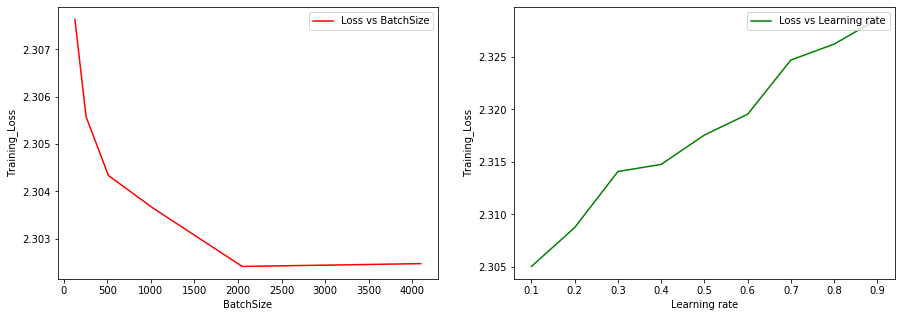

In [7]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(Batch,train_loss,'r-',label='Loss vs BatchSize') 
plt.legend(loc='upper right')
plt.xlabel('BatchSize')
plt.ylabel('Training_Loss')
plt.subplot(122)
plt.plot(Y,train_loss1,'g-',label='Loss vs Learning rate') 
plt.legend(loc='upper right')
plt.xlabel('Learning rate')
plt.ylabel('Training_Loss')